In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the data
file = r'D:\Learning\Codes\AQI\Data\Real-Data\Real_Combine.csv'
data = pd.read_csv(file)
data.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4   40.333333
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1   17.708333
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

In [4]:
# Checking for NULL values 
data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    2
dtype: int64

<AxesSubplot:>

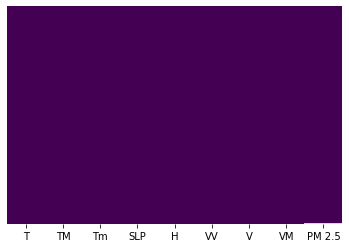

In [5]:
# Plot to check NULL values using Heatmap
sns.heatmap(data.isnull(), yticklabels=False, cbar=False,cmap='viridis' )

In [6]:
df = data.dropna()

In [7]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1088 non-null   float64
 1   TM      1088 non-null   float64
 2   Tm      1088 non-null   float64
 3   SLP     1088 non-null   float64
 4   H       1088 non-null   float64
 5   VV      1088 non-null   float64
 6   V       1088 non-null   float64
 7   VM      1088 non-null   float64
 8   PM 2.5  1088 non-null   float64
dtypes: float64(9)
memory usage: 85.0 KB


In [9]:
X = df.iloc[:,:-1] ## Independent feature
y = df.iloc[:,-1] ## Depedent features

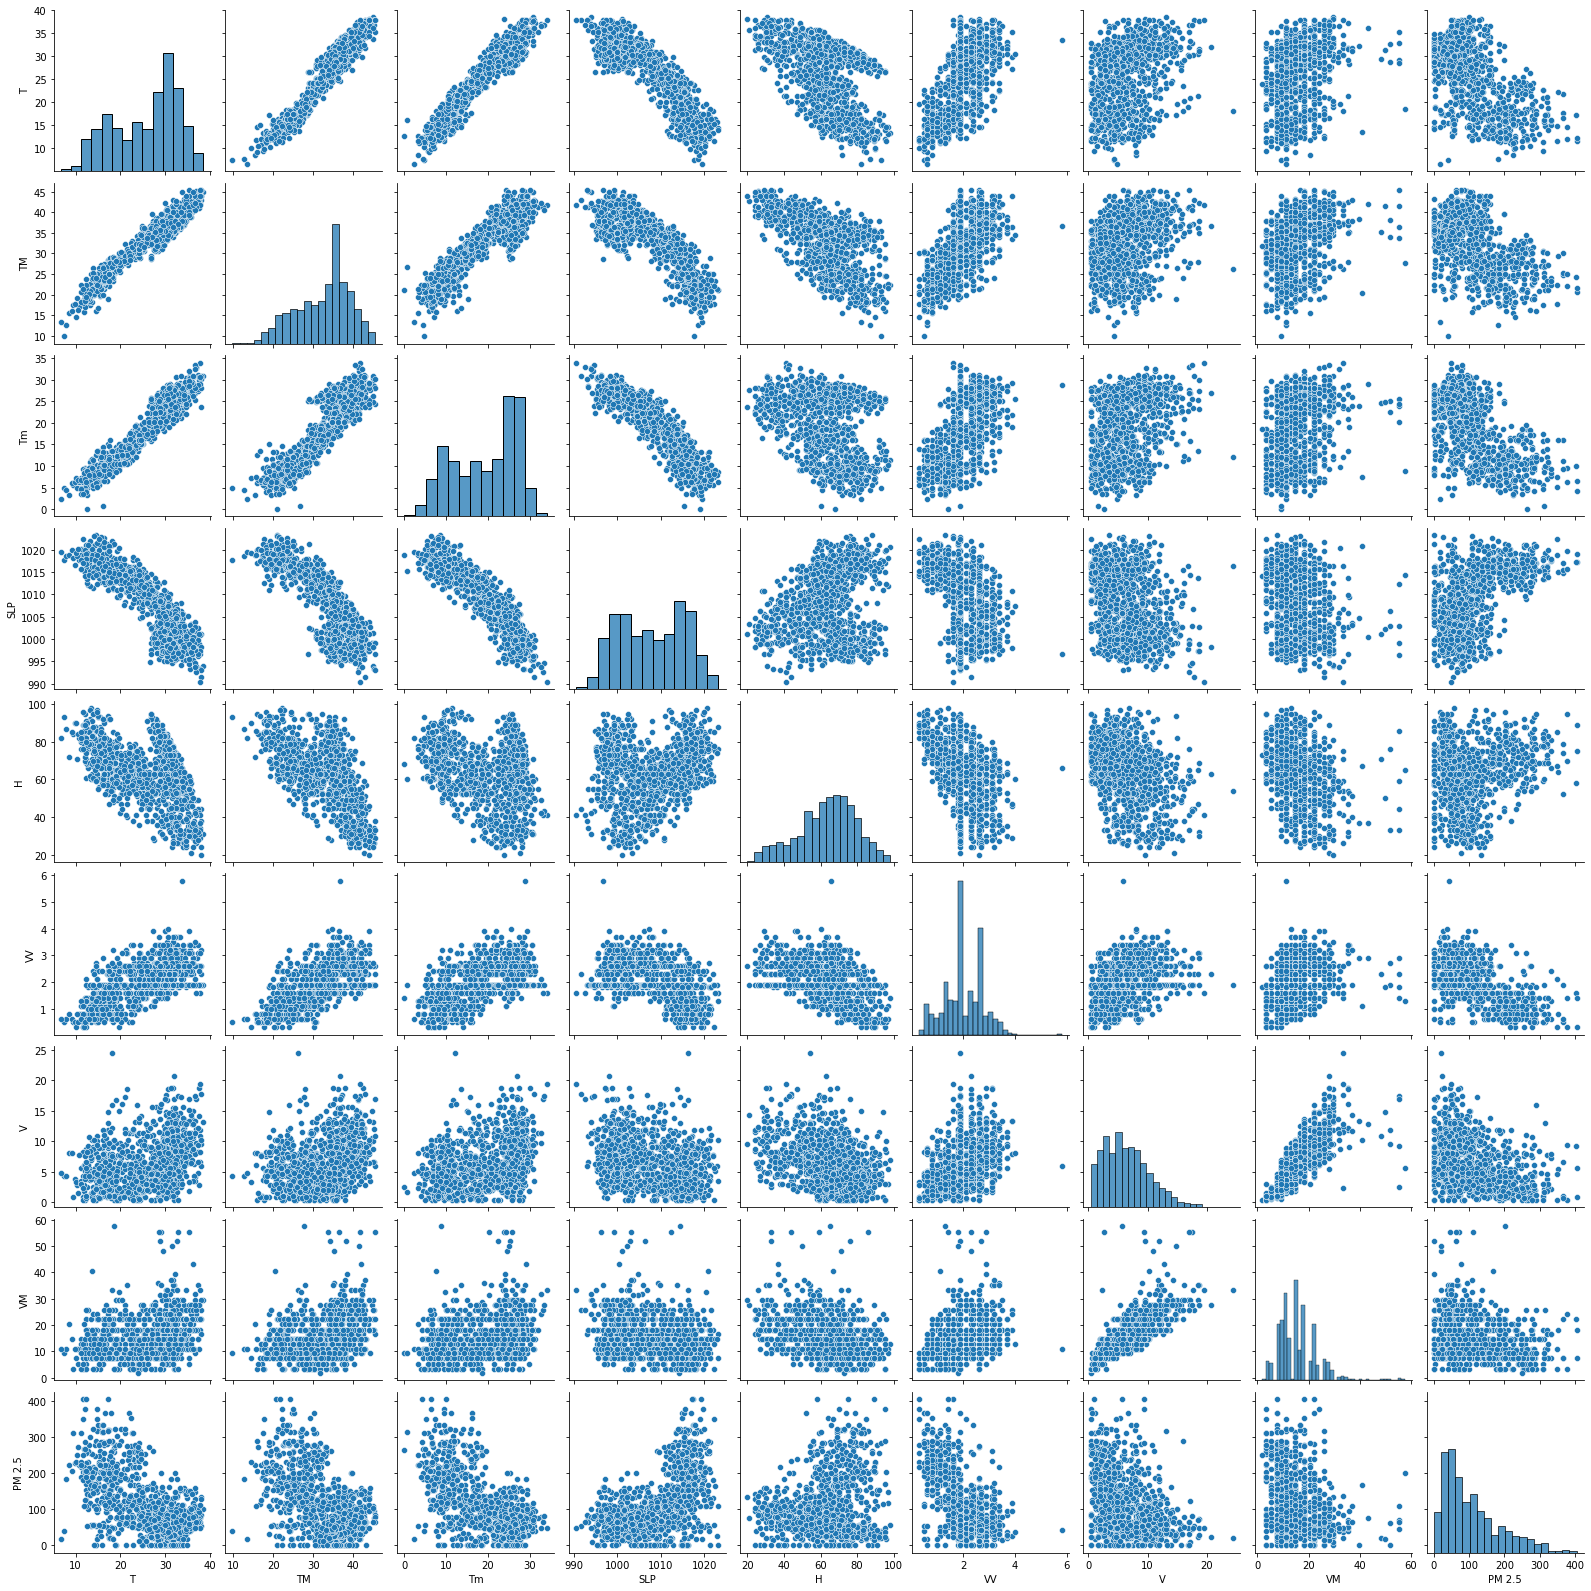

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.963416  0.957227 -0.883207 -0.488919  0.625547  0.320218   
TM      0.963416  1.000000  0.889979 -0.826008 -0.576799  0.598727  0.303218   
Tm      0.957227  0.889979  1.000000 -0.912333 -0.275047  0.547490  0.312165   
SLP    -0.883207 -0.826008 -0.912333  1.000000  0.231971 -0.483494 -0.325862   
H      -0.488919 -0.576799 -0.275047  0.231971  1.000000 -0.489597 -0.356241   
VV      0.625547  0.598727  0.547490 -0.483494 -0.489597  1.000000  0.369851   
V       0.320218  0.303218  0.312165 -0.325862 -0.356241  0.369851  1.000000   
VM      0.276548  0.285671  0.244408 -0.269129 -0.368694  0.325963  0.780952   
PM 2.5 -0.603371 -0.536969 -0.638572  0.586205  0.145657 -0.568058 -0.318189   

              VM    PM 2.5  
T       0.276548 -0.603371  
TM      0.285671 -0.536969  
Tm      0.244408 -0.638572  
SLP    -0.269129  0.586205  
H      -0.368694  0.145657  
VV      0.325963 -0.568058  
V       0.780952 -0.318189  
VM      1.000000 -0.252764  
PM 2.5 -0.252764  1.000000

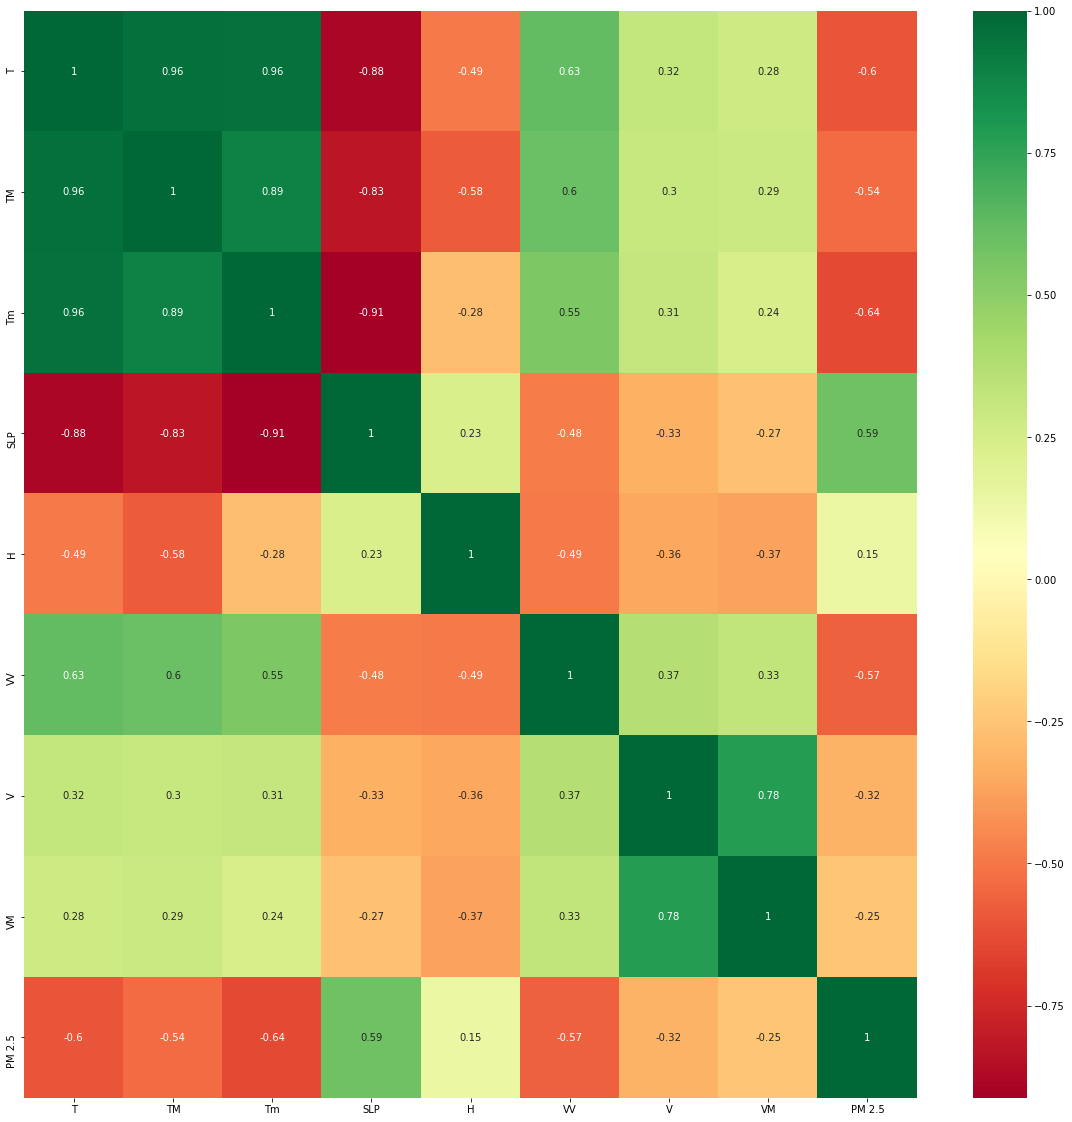

In [12]:
#Correlation using Heatmap
plt.figure(figsize=(20,20))
g = sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [13]:
# Feature Importance 
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [14]:
print(model.feature_importances_)

[0.14885199 0.10774855 0.19932803 0.14890147 0.08541606 0.19397356
 0.06541259 0.05036775]


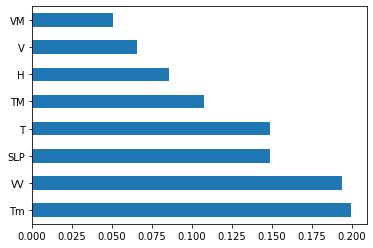

In [15]:
#Plot graph for the feature importance for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

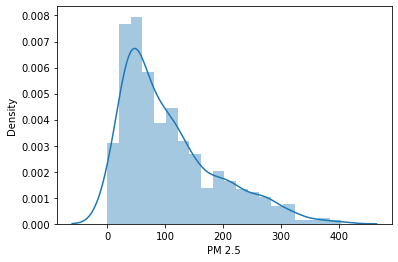

In [16]:
sns.distplot(y)

In [17]:
# Test Train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
print('Coefficient of determination R^2 on train dataset:{}'.format(regressor.score(X_train, y_train)))
print('Coefficient of determination R^2 on test dataset:{}'.format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 on train dataset:0.5163103517656166
Coefficient of determination R^2 on test dataset:0.4799969190802913


In [21]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,y,cv=5)

In [69]:
score.mean()

0.4655524008008431

# Model Evaluation

In [24]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficients'])
coeff_df

Coefficients
T       -0.457821
TM       1.393267
Tm      -5.208765
SLP      0.556994
H       -0.776195
VV     -41.168346
V       -1.993223
VM       0.151424

Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in T is associated with an decrease of 0.4578 in AQI PM2.5 .
Holding all other features fixed, a 1 unit increase in TM is associated with an increase of 1.39 in AQI PM 2.5

In [28]:
prediction = regressor.predict(X_test)

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

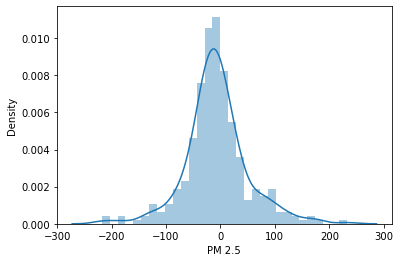

In [29]:
#Ploting
sns.distplot(y_test-prediction)

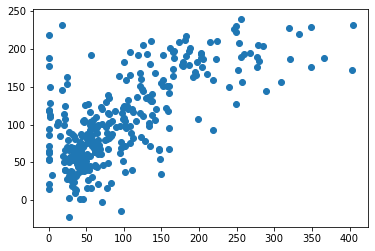

In [30]:
plt.scatter(y_test,prediction)

In [31]:
from sklearn import metrics

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 40.938778476376314
MSE: 3366.1264951631238
RMSE: 58.01832895872755


### Comparing these metrics:

MAE is the easiest to understand, because it's the average error.

MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [33]:
import pickle

In [35]:
# open a file, where you want to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)